Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Figure for Geometry with reflective lens and absorbing rest.

MFPT:  2.1320740416666673 days
Proportion of exits through hyaloid:  0.2687
Proportion of exits through ILM:  0.7313


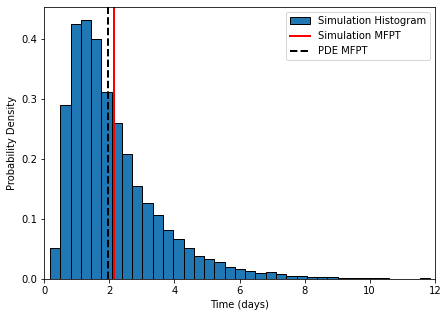

the mode:1.2821283783783781 days


In [2]:
## Importing data and looking at mean values and proportions
data = np.genfromtxt("data/fpt_array_geom0.1_24-01-2023_deltat0.01.csv", delimiter=",")
fpt = data[:,0]
exit = data[:,1]

#pde_mfpt_mean = 1.8756  # Geometry A
pde_mfpt_mean = 1.9453

# Looking at mean first passage time
fpt_mean = np.nanmean(fpt)
# Looking at proportion of exit from hyaloid and ilm
prop_hya = np.count_nonzero(exit == 0)/np.count_nonzero(~np.isnan(exit))
prop_ilm = np.count_nonzero(exit == 1)/np.count_nonzero(~np.isnan(exit))

print('MFPT: ', fpt_mean/24, 'days')
print('Proportion of exits through hyaloid: ', prop_hya)
print('Proportion of exits through ILM: ', prop_ilm)

# Plot histogram without NaN values.
fpt_days = fpt/24
# Plot histogram without NaN values.
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
n, bins, patches = ax.hist(fpt_days[~np.isnan(fpt_days)], bins=37, density=True, edgecolor = "black", label = 'Simulation Histogram')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Probability Density')
plt.axvline(x=fpt_mean/24, color='red', linestyle='-', linewidth=2, label = 'Simulation MFPT')
plt.axvline(x=pde_mfpt_mean, color='black', linestyle='--', linewidth=2, label = 'PDE MFPT')
ax.set_xlim([0, 12])
plt.legend()
#plt.savefig('fpt_pdf_geom1_p1_05-12-2022_days.eps', format='eps')
plt.show()

mode_index = n.argmax()
print('the mode:'+ str((bins[mode_index] + bins[mode_index+1])/2), 'days')

In [15]:
data = np.genfromtxt("time_array_geom0_20-01-2023_tests.csv", delimiter=",")
time = data
for n in [1, len(time)-2]:
    if time[n+1] - time[n] != 0:
        print(time[n], time[n+1])

0.022 0.033
42.57 42.581


#### Figure comparing avg FPT for Geometries A and B depending on time step 

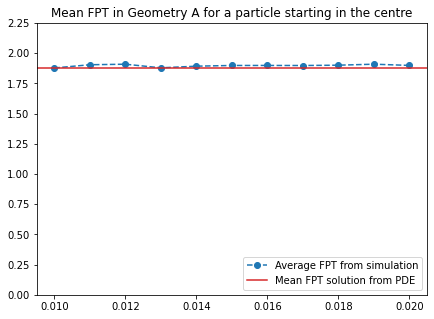

Text(0.5, 1.0, 'Mean FPT in Geometry A and B for a particle starting in the centre')

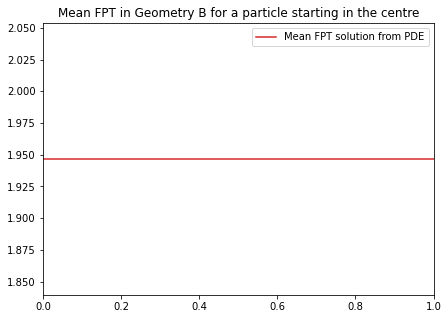

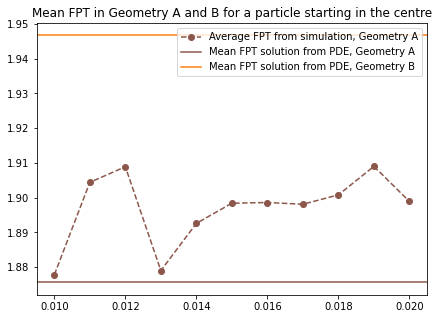

In [10]:
# For Geometry A the sphere with absorbing boundary conditions,
# Geometry B the sphere with reflective boundary condition for
# the lens section and absorbing boundary condition for the rest
# of the eye, we obtained the following average FPT:
avg_fpt_geomA = [1.8778, 1.9044, 1.9089, 1.879, 1.8926, 1.8984, 1.8986, 1.8981, 1.9008, 1.909, 1.8989]
avg_fpt_geomB = [2.3667, 2.1368, 1.9734, 1.7764]
delta_t = [0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.020]

# While the values obtained through the PDE are
mfpt_geomA = 1.8756
mfpt_geomB = 1.9467

# Plot A
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
ax.plot(delta_t, avg_fpt_geomA, marker='o', color='C0', linestyle='dashed', label='Average FPT from simulation')
plt.axhline(y=mfpt_geomA, color='C3', label='Mean FPT solution from PDE')
plt.legend(loc='lower right')
plt.ylim((0,2.25))
plt.title('Mean FPT in Geometry A for a particle starting in the centre')
plt.show()

# Plot B
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
#ax.plot(delta_t, avg_fpt_geomB, marker='o', color='C0',linestyle='dashed', label='Average FPT from simulation')
plt.axhline(y=mfpt_geomB, color='C3', label='Mean FPT solution from PDE')
plt.legend()
plt.title('Mean FPT in Geometry B for a particle starting in the centre')
#plt.show()

# Plot together 
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,5)
ax.plot(delta_t, avg_fpt_geomA, marker='o', color='C5', linestyle='dashed', label='Average FPT from simulation, Geometry A')
#ax.plot(delta_t, avg_fpt_geomB, marker='o', color='C1',linestyle='dashed', label='Average FPT from simulation, Geometry B')
plt.axhline(y=mfpt_geomA, color='C5', label='Mean FPT solution from PDE, Geometry A')
plt.axhline(y=mfpt_geomB, color='C1', label='Mean FPT solution from PDE, Geometry B')
plt.legend()
plt.title('Mean FPT in Geometry A and B for a particle starting in the centre')
#plt.show()